In [1]:
%pdb

Automatic pdb calling has been turned ON


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from village_simulator.simulation.calibration.rainfall import sample_rainfall_in_period
from village_simulator.simulation.components.farming import WHEAT_HARVEST_DATE, WHEAT_SOWING_DATE

In [3]:
num_years = 4_000
num_tiles = 100
harvest_date = pd.Timestamp(2000, WHEAT_HARVEST_DATE["month"], WHEAT_HARVEST_DATE["day"])

In [4]:
# get mid-growth period
start_date = harvest_date - pd.Timedelta(days=180)
end_date = start_date + pd.Timedelta(days=90)
date_range = pd.date_range(start_date, end_date, inclusive="right")

mid_growth_rainfall_raw = sample_rainfall_in_period(date_range, num_years, num_tiles)
mid_growth_rainfall = mid_growth_rainfall_raw.groupby(["tile", "year"]).sum()
mid_growth_rainfall.describe()

count    400000.000000
mean        688.649433
std         109.159473
min         300.014252
25%         612.911324
50%         683.695092
75%         760.441819
max        1192.947688
Name: 0, dtype: float64

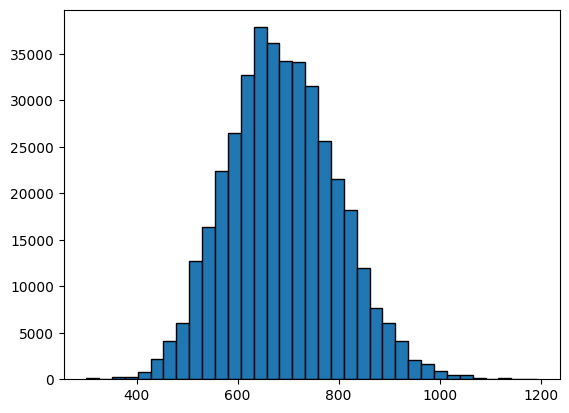

In [5]:
bin_width = 25
bins = int((mid_growth_rainfall.max() - mid_growth_rainfall.min()) / 25)
plt.hist(mid_growth_rainfall, bins=bins, edgecolor='black')
plt.show()

In [6]:
# get late-growth period
start_date = harvest_date - pd.Timedelta(days=90)
end_date = harvest_date
date_range = pd.date_range(start_date, end_date, inclusive="right")

late_growth_rainfall_raw = sample_rainfall_in_period(date_range, num_years, num_tiles)
late_growth_rainfall = late_growth_rainfall_raw.groupby(["tile", "year"]).sum()
late_growth_rainfall.describe()

count    400000.000000
mean        685.547466
std         112.500009
min         342.852501
25%         605.107473
50%         680.933198
75%         758.264820
max        1170.884269
Name: 0, dtype: float64

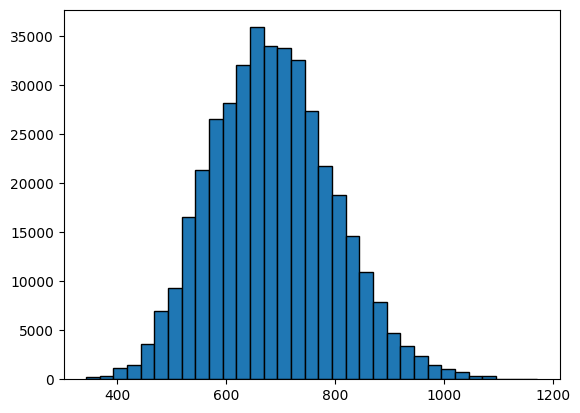

In [7]:
bin_width = 25
bins = int((late_growth_rainfall.max() - late_growth_rainfall.min()) / 25)
plt.hist(late_growth_rainfall, bins=bins, edgecolor='black')
plt.show()

In [8]:
late_growth_rainfall_raw.head()

date        year  tile
2000-02-16  0     0       0.0
                  1       0.0
                  2       0.0
                  3       0.0
                  4       0.0
Name: 0, dtype: float64

In [9]:
num_years = 1_000
sowing_date = pd.Timestamp(1999, WHEAT_SOWING_DATE["month"], WHEAT_SOWING_DATE["day"])

In [10]:
# get full growing period
start_date = sowing_date
end_date = harvest_date
date_range = pd.date_range(start_date, end_date, inclusive="right")

total_rainfall_raw = sample_rainfall_in_period(date_range, num_years, num_tiles)

In [11]:
((total_rainfall_raw.diff() == 0) & (total_rainfall_raw == 0)).sum()

7442845

In [12]:
total_rainfall_raw = total_rainfall_raw.reorder_levels(['tile', 'year', 'date']).sort_index().reset_index()
total_rainfall_raw["cumulative_dry_days"] = ((total_rainfall_raw[0].diff() == 0) & (total_rainfall_raw[0] == 0) & (total_rainfall_raw["year"].diff() == 0))
cumulative_dry_days = total_rainfall_raw[['year', 'tile', 'cumulative_dry_days']].groupby(["year", "tile"]).sum()
cumulative_dry_days.describe()

,cumulative_dry_days
count,100000.000000
mean,27.959000
std,6.210129
min,9.000000
25%,24.000000
50%,28.000000
75%,32.000000
max,55.000000


/tmp/ipykernel_385132/1927378605.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  bins = int((cumulative_dry_days.max() - cumulative_dry_days.min()) / bin_width)


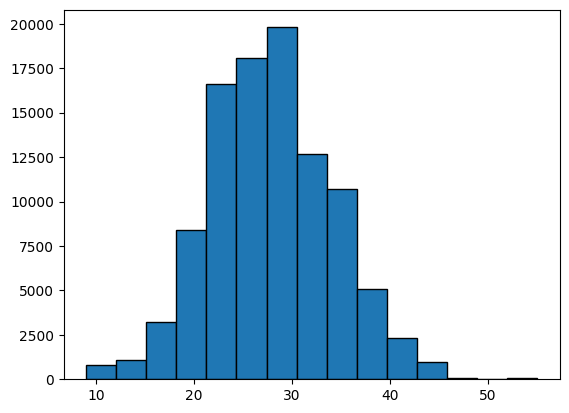

In [13]:
bin_width = 3
bins = int((cumulative_dry_days.max() - cumulative_dry_days.min()) / bin_width)
plt.hist(cumulative_dry_days, bins=bins, edgecolor='black')
plt.show()